In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, AvgPool2D, Flatten, Dense

input_image = InputLayer(input_shape=(32, 32, 3))

model = Sequential([
    input_image,
    Conv2D(filters=32, kernel_size=3, padding="valid"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=5, padding="same"),
    AvgPool2D(pool_size=2),
    Flatten(),
    Dense(units=124),
    Dense(units=10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        25632     
                                                                 
 average_pooling2d (AverageP  (None, 7, 7, 32)         0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 124)               1

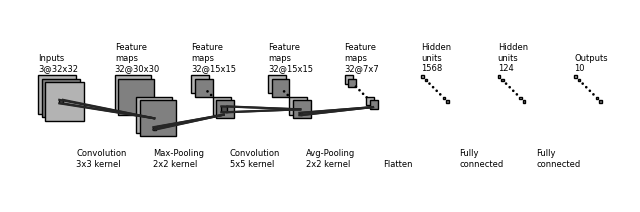

In [2]:
from draw_convnet import plot_keras_convnet
plot_keras_convnet(input_image, model, font_size=6)

In [3]:
import torch
import torch.nn as nn

input_image = torch.randn(3, 32, 32)  # (C, H, W)
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding="valid"),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same"),
    nn.AvgPool2d(kernel_size=2),
    nn.Flatten(),  # if image shape==(3, 32, 32), Flatten gives (1, 1568)
    nn.Linear(in_features=1568, out_features=124),
    nn.Linear(in_features=124, out_features=10),
)

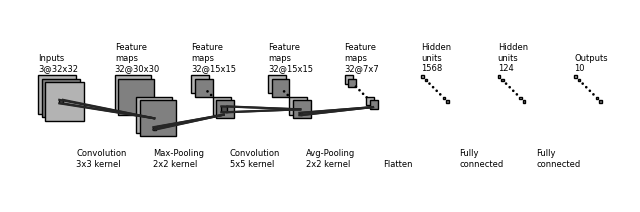

In [4]:
from draw_convnet import plot_pytorch_convnet
plot_pytorch_convnet(input_image, model, font_size=6)